# Exploring the World of Books and Reviews 

### Team members: Arun Mathew, Nikki Rastogi, Aquib Hussain

The code block below loads three datasets related to books and reviews into Pandas DataFrames using pd.read_csv() function with specific URL paths.This code snippet succinctly loads three datasets into DataFrames (df, ratings_df, and user_df) by directly reading CSV files from specific URLs hosted on GitHub.

# Abstract
Should write this
# Introduction to World of Books and Reviews

In a world filled with endless literary choices, it can be challenging to find the next great read. This data project, "Exploring the World of Books and Reviews," is a journey into the vast realm of literature, designed to help book enthusiasts, researchers, and readers discover new insights and trends within the literary landscape.

Our dataset contains a wealth of information, encompassing a wide range of books, each a unique treasure waiting to be explored. It includes crucial details such as book IDs, authors, original publication years, titles from csv file and language, number of pages average ratings, and extensive user reviews from Web Scraping. With this data at our fingertips, we are poised to uncover intriguing patterns, preferences, and trends that shape the world of literature.

Throughout this project, we will delve into the role of authors, original publication years, ratings and language in influencing a book's reception. We will explore how average ratings and user reviews contribute to a book's reputation and popularity. Whether you're an avid reader seeking new recommendations, a data enthusiast fascinated by book analytics, or an author looking to understand what makes a bestseller, this project offers a unique and data-driven perspective on the world of books and reviews. Join us on this literary journey, and let's explore the stories hidden within the data. 




In [3]:
"""
Importing the Required Python Libraries 
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings

warnings.filterwarnings("ignore")

"""
    Loads the books dataset into a Pandas DataFrame.
    
    Returns:
    df (DataFrame): DataFrame containing book information.
    """

df = pd.read_csv(
    "https://raw.githubusercontent.com/nikkirastogi/Exploring-the-World-of-Books-and-Reviews/ar/BX-Books.csv",
    delimiter=";",
    encoding="latin1",
    error_bad_lines=False,
    warn_bad_lines=False,
    dtype={"Year-Of-Publication": object},
)

"""
    Loads the book ratings dataset into a Pandas DataFrame.
    
    Returns:
    ratings_df (DataFrame): DataFrame containing book ratings.
    """
ratings_df = pd.read_csv("https://raw.githubusercontent.com/nikkirastogi/Exploring-the-World-of-Books-and-Reviews/ar/BX-Book-Ratings.csv",
            delimiter=";",
            encoding="latin1",
            error_bad_lines=False,
            warn_bad_lines=False,
            dtype={"Book-Rating": object},)


### DATA PREPROCESSING 


In [4]:
from src.book_review import books_cleaning as bs

In [5]:
obj = bs.cleaning.merging(df,ratings_df)

### DATA SUMMARY 
From the src.book_review we are importing the data_summary which can be called as ds

In [5]:
from src.book_review import books_summary as ds

Using the cleaning function from the data_summary module to clean or process the df, ratings_df, and user_df DataFrames. The cleaned or processed data is saved into a variable obj, and then exported to a CSV file named updated_dataset.csv without including the DataFrame index.

This Function is used to view all the columns in the dataset

In [7]:
ds.data.details(obj)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Ratings
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,5
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,3
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,6


This Function extracts attributes from the provided obj variable for further analysis.

In [9]:
ds.data.attributes(obj)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Book-Ratings'],
      dtype='object')

This Function is used to find the info of the Dataset

In [10]:
ds.data.info(obj)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271360 non-null  object 
 1   Book-Title           271360 non-null  object 
 2   Book-Author          271359 non-null  object 
 3   Year-Of-Publication  271357 non-null  float64
 4   Publisher            271358 non-null  object 
 5   Book-Ratings         271360 non-null  object 
dtypes: float64(1), object(5)
memory usage: 12.4+ MB


This Function is used to find the Null Values in the Dataset

In [6]:
ds.data.null_values(obj)

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Book-Ratings           0
dtype: int64

This Function is used to find Shape of the dataset

In [ ]:
ds.data.shape(obj)

(271360, 6)

This Function is Used to describe the Dataset.

In [ ]:
ds.data.describe(obj)

,Year-Of-Publication
count,271357.000000
mean,1959.760817
std,257.994226
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


This Function is used to define the Data types in the object 

In [8]:
ds.data.data_type(obj)

ISBN                    object
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
Book-Ratings             int64
dtype: object

### EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis (EDA) serves as the cornerstone for understanding and interpreting our extensive dataset, which encapsulates diverse book details and user-generated reviews obtained through web scraping. EDA plays a pivotal role by providing a comprehensive view of the dataset's structure, integrity, and inherent patterns. It enables us to identify relationships between crucial attributes like authors, publication years, and user ratings, shedding light on the intricate dynamics shaping literary preferences. Through visualizations and summary statistics, EDA unveils hidden trends, correlations, and insights crucial for comprehending a book's reception and popularity. This analysis is invaluable for readers seeking literary recommendations, data enthusiasts exploring book analytics, and authors deciphering bestseller dynamics, offering a data-driven perspective on the multifaceted realm of books and reviews. EDA's significance lies in its ability to guide decision-making, support further analyses, and serve as a fundamental tool for deriving meaningful conclusions from the intricate narratives woven within our expansive dataset.

Proceeding further, we are importing the EDA from src.book 

In [10]:

from src.book_review import book_eda

The function highest_publisher(obj) uses the DataFrame df to determine and visualize the top 10 publishers with the most books. It computes the frequency of each publisher's appearance in the dataset, creating a bar chart representation where each bar signifies the count of books published by these top publishers. The chart, colored in sky blue, displays the distribution of books among these publishers, offering a quick glance at the prominence of publishing houses based on their book counts. This visualization aids in swiftly identifying the major contributors to the dataset in terms of book publications. 
Here we can see that the Harlequin has the Highest count of morethan 7000 and the Warner Books has scored a count of around 2500 among the top 10 Publishers.

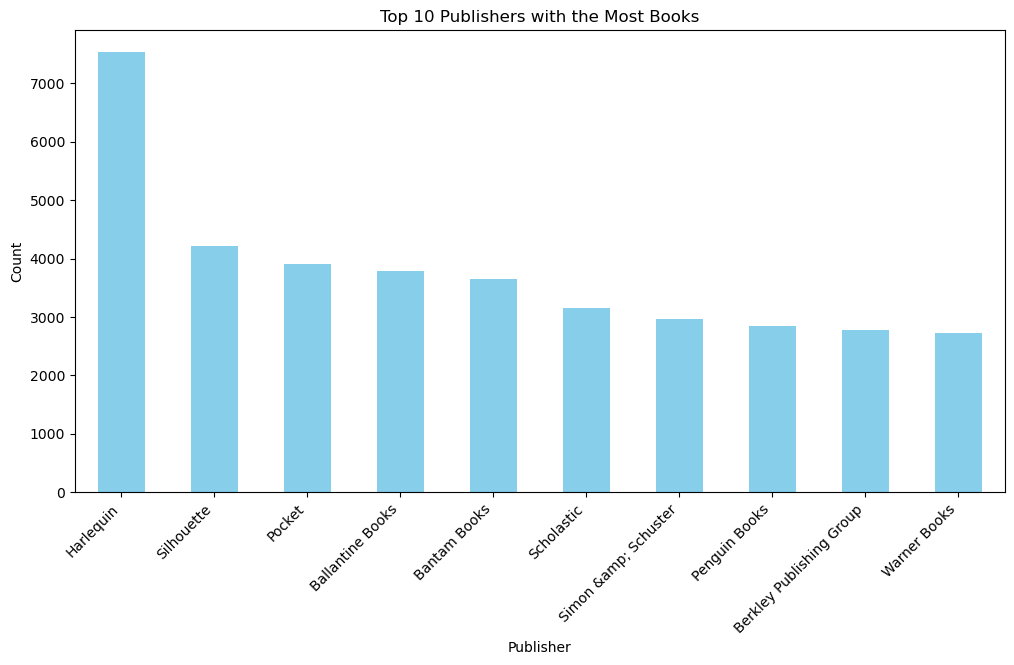

In [11]:

book_eda.EdaAnalysis.highest_publisher(obj)

The distribution(obj) function analyzes the publication year distribution in DataFrame df, focusing on years between 1800 and 2050. It creates a histogram displaying the count of books published in 10-year intervals within this timeframe. This plot offers a clear depiction of publication trends over time, aiding in recognizing patterns or spikes in book releases.

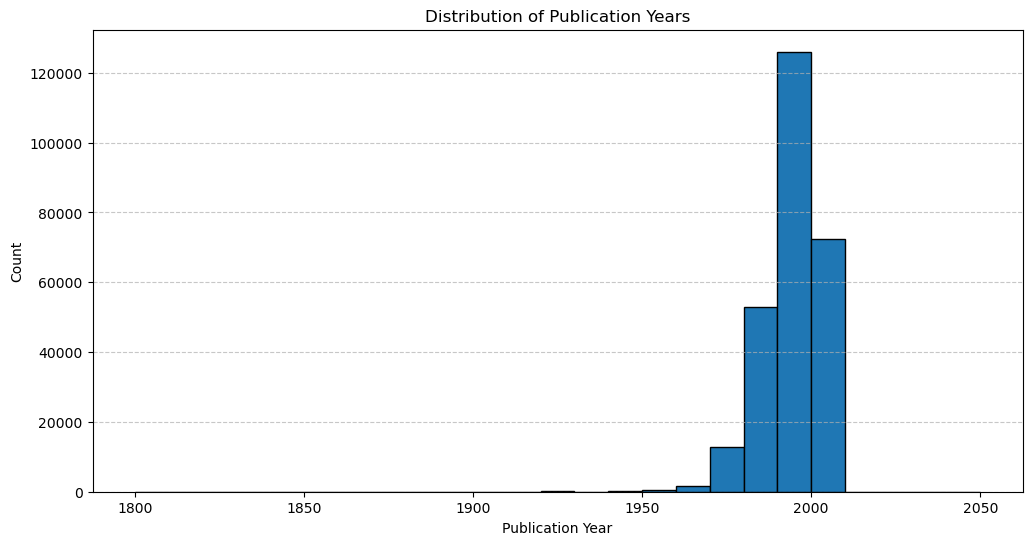

In [12]:
book_eda.EdaAnalysis.distribution(obj)

The word_cloud(df) function creates a visual representation known as a word cloud, depicting the distribution of book titles within the DataFrame obj. By aggregating all book titles and forming a cloud where word size corresponds to title frequency, it visually emphasizes the most common or frequently occurring titles. The function utilizes the WordCloud library to generate this representation, setting parameters for dimensions and background color. Once generated, the resulting word cloud offers a quick insight into prevalent themes or popular book titles present in the dataset, aiding in a rapid grasp of overarching trends or recurring topics among the books.

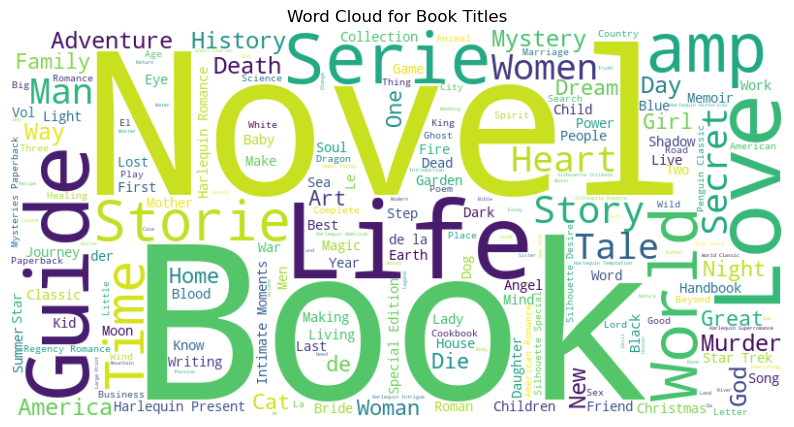

In [13]:
book_eda.EdaAnalysis.word_cloud(obj)

The highest_author(obj) function identifies and visualizes the top 10 authors with the most books in the DataFrame obj. It calculates the frequency of each author's appearance in the "Book-Author" column, generates a bar chart representing the author counts, and displays it. This visualization provides a quick overview of the most prolific authors within the dataset.The Count of Authors that is Agatha Christie is shown as the Highest and Charles Dickens the Lowest.

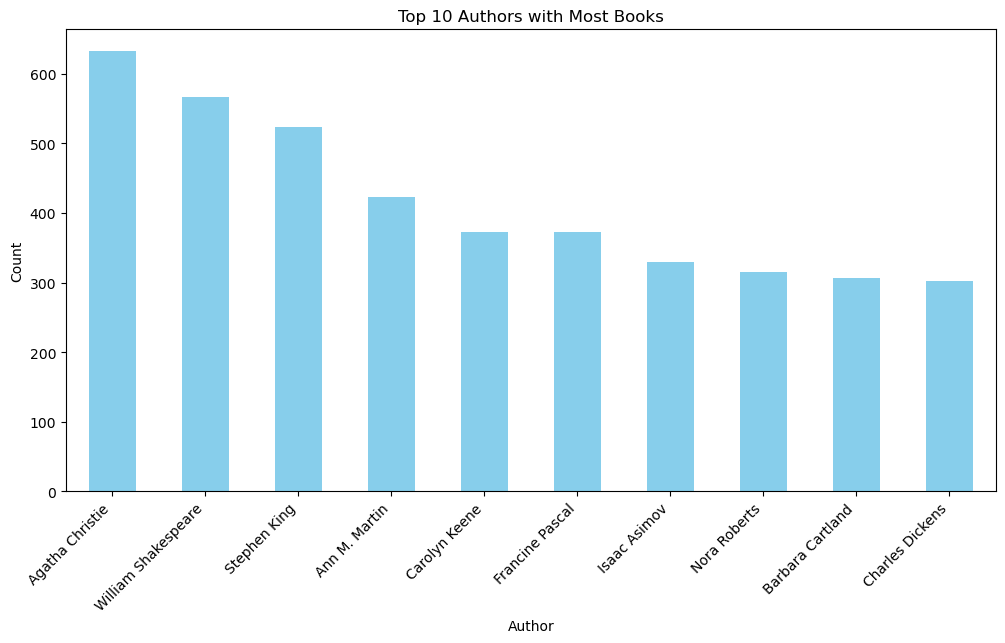

In [14]:

book_eda.EdaAnalysis.highest_author(obj)

The highest_ratings(obj) function focuses on the distribution of book ratings in the DataFrame obj. The Generated histogram using seaborn's histplot() function, illustrating the frequency distribution of book ratings. This visualization aids in understanding the spread and frequency of different rating values within the dataset. The Book ratings with 0 are higher for which there is a steep decline in the Frequency.

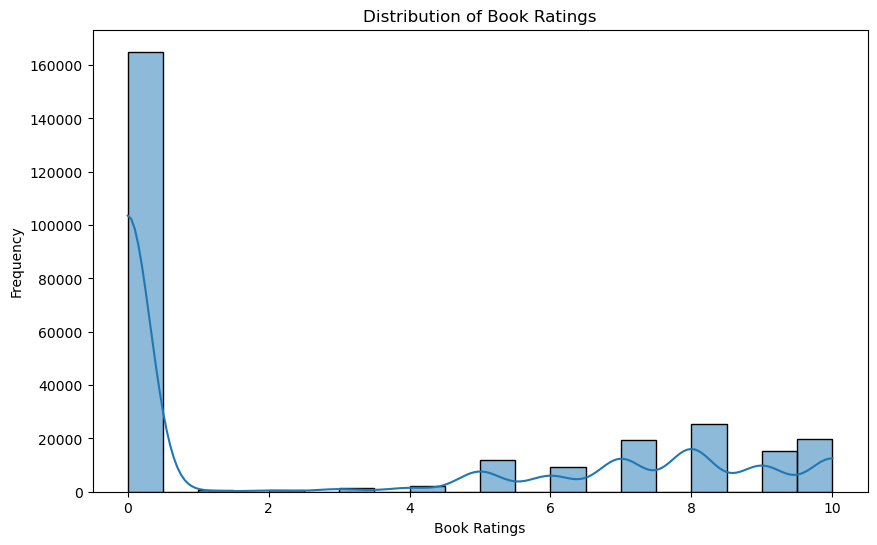

In [15]:
book_eda.EdaAnalysis.highest_ratings(obj)

The ratings_and_year(obj) function explores the relationship between book ratings and the year of publication in the DataFrame obj. It creates a scatter plot using seaborn's scatterplot() function, mapping the correlation, if any, between book ratings and the year of publication. This visualization helps in discerning any trends or connections between ratings and publication years.

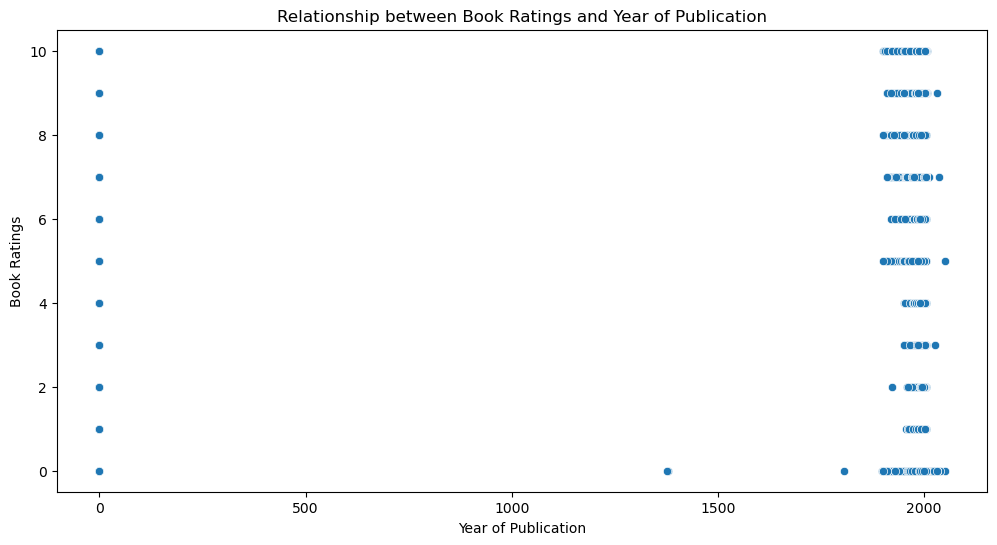

In [16]:
book_eda.EdaAnalysis.ratings_and_year(obj)

The ratings_per_book(Obj) function analyzes the count of ratings per book in the DataFrame obj. It employs seaborn's countplot() function to showcase the frequency of different ratings assigned to books. This visualization presents a clear distribution of ratings received by books in the dataset.

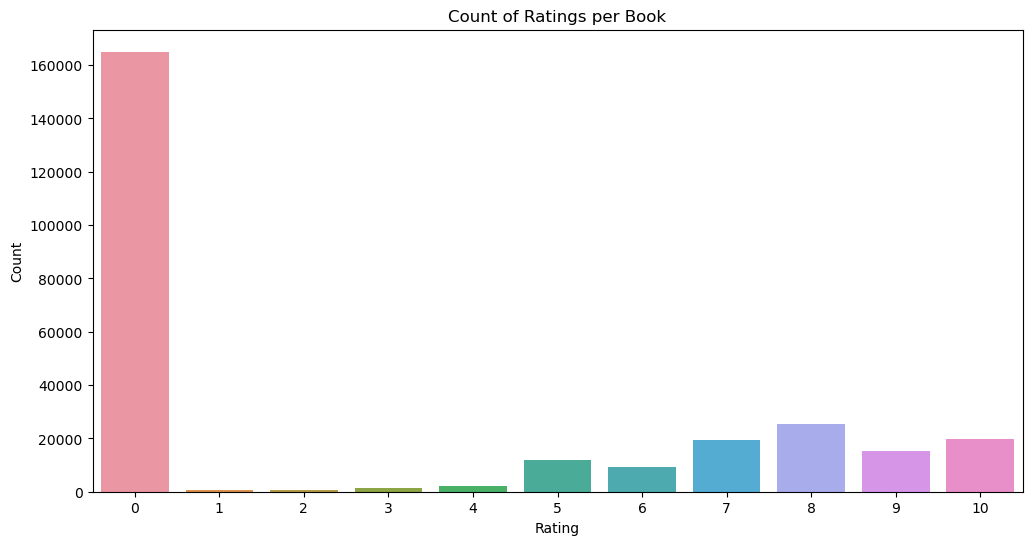

In [17]:
book_eda.EdaAnalysis.ratings_per_book(obj)